In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import numpy.fft as npf

In [2]:
def get_data(fn, Nt, Ny, Nx):
    data = np.fromfile(fn)
    return (data[::2] + 1j*data[1::2]).reshape(Nt, Ny, Nx)

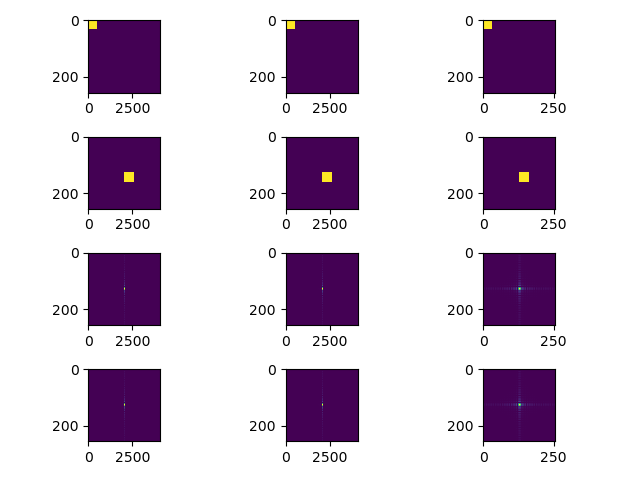

In [17]:
# not working for 3d FFT
Nt, Ny, Nx = 2**4, 2**9, 2**13
Nt, Ny, Nx = 2**4, 2**13, 2**9
Nt, Ny, Nx = 2**8, 2**8, 2**12

# not working for both 3d and 2D+1D
Nt, Ny, Nx = 2**8, 2**10, 2**10
Nt, Ny, Nx = 2**8, 2**12, 2**8

# working
Nt, Ny, Nx = 2**4, 2**9, 2**9
Nt, Ny, Nx = 2**4, 2**9, 2**10
Nt, Ny, Nx = 2**4, 2**9, 2**11
Nt, Ny, Nx = 2**4, 2**9, 2**12
Nt, Ny, Nx = 2**4, 2**12, 2**9
Nt, Ny, Nx = 2**4, 2**10, 2**10
Nt, Ny, Nx = 2**8, 2**9, 2**9
Nt, Ny, Nx = 2**8, 2**9, 2**10
Nt, Ny, Nx = 2**8, 2**8, 2**11

# eval
Nt, Ny, Nx = 2**8, 2**8, 2**12

z = get_data('/tmp/Etyx.bin', Nt, Ny, Nx)
Z3d = get_data('/tmp/Efkykx3d.bin', Nt, Ny, Nx)
Z21d = get_data('/tmp/Efkykx21d.bin', Nt, Ny, Nx)
Zp = npf.fftn(z)

fig, ((ax01, ax02, ax03),
      (ax31, ax32, ax33),
      (ax211, ax212, ax213),
      (axp1, axp2, axp3)) = plt.subplots(ncols=3, nrows=4)
ax01.imshow(abs(z[0]), aspect=Nx/Ny, interpolation='none')
ax02.imshow(abs(z[:, 0]), aspect=Nx/Nt, interpolation='none')
ax03.imshow(abs(z[:, :, 0]), aspect=Ny/Nt, interpolation='none')
ax31.imshow(abs(npf.fftshift(Z3d[0])), aspect=Nx/Ny, interpolation='none')
ax32.imshow(abs(npf.fftshift(Z3d[:, 0])), aspect=Nx/Nt, interpolation='none')
ax33.imshow(abs(npf.fftshift(Z3d[:, :, 0])), aspect=Ny/Nt, interpolation='none')
ax211.imshow(abs(npf.fftshift(Z21d[0])), aspect=Nx/Ny, interpolation='none')
ax212.imshow(abs(npf.fftshift(Z21d[:, 0])), aspect=Nx/Nt, interpolation='none')
ax213.imshow(abs(npf.fftshift(Z21d[:, :, 0])), aspect=Ny/Nt, interpolation='none')
axp1.imshow(abs(npf.fftshift(Zp[0])), aspect=Nx/Ny, interpolation='none')
axp2.imshow(abs(npf.fftshift(Zp[:, 0])), aspect=Nx/Nt, interpolation='none')
axp3.imshow(abs(npf.fftshift(Zp[:, :, 0])), aspect=Ny/Nt, interpolation='none')
fig.tight_layout()